In [186]:
%load_ext autoreload
%autoreload 2

from pycocotools.coco import COCO
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io as io
import numpy as np
from tools.utils import draw_bbboxes, xyxy_to_xywh, xywh_to_xyxy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
#prediction_file = "Outputs/coco/bbox_coco_2017_val_results.json"
prediction_file = "data/outputs/coco_parts/123_debug/faster-rcnn/r-50-fpn-2x/test/bbox_coco2017_part1_debug_results.json"
coco_val = COCO("data/coco/annotations/instances_train2017.json")


coco_cat_to_continous_cat = {v: i+1 for i,v in enumerate(coco_val.getCatIds())}
continious_cat_to_coco = {v:k for k,v in coco_cat_to_continous_cat.items()}

loading annotations into memory...
Done (t=37.35s)
creating index...
index created!


In [190]:
with open(prediction_file, "r") as f:
    preidctions = json.load(f)
class_prediction = [pred["category_id"] for pred in preidctions]
print(set(class_prediction), len(set(class_prediction)), len(coco_val.cats))
print("images", np.random.choice([pred["image_id"] for pred in preidctions]))

{64, 1, 43, 51, 53, 88, 57} 7 80
images 176342


In [191]:
images = coco_val.imgs

In [215]:
def visualize(url,  bboxes, classes):
    I = io.imread(url)
    # Create a Rectangle patch
    fig,ax = plt.subplots(1, figsize=(15,15))
    plt.imshow(I); plt.axis('off')
    
    for idx, bbox in enumerate(bboxes):
        x, y, w, h = bbox
        if classes[idx]!=88:
            rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none' )
            ax.add_patch(rect)
            ax.annotate(coco_val.cats[classes[idx]]["name"], (x+w/2,y))

In [216]:
predicted_imgs_to_annotations = {}
for prediction in preidctions:
    img = prediction["image_id"]
    if img not in predicted_imgs_to_annotations.keys():
        predicted_imgs_to_annotations[img] = []
    predicted_imgs_to_annotations[img].append(prediction)

[(64, 1), (43, 2), (88, 88), (57, 9)]


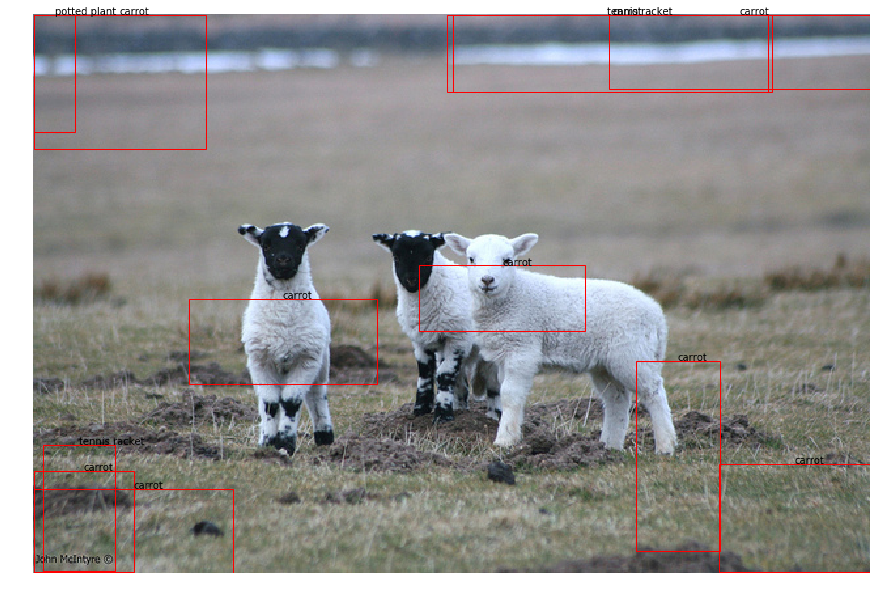

In [221]:

N =  np.random.choice([pred["image_id"] for pred in preidctions])
bboxes, classes = [] , []
for item in predicted_imgs_to_annotations[N]:
    bboxes.append(item["bbox"])
    classes.append(item["category_id"])
print([(cl, len(np.where(np.array(classes)==cl)[0])) for cl in set(classes)])
visualize(images[N]["coco_url"],  bboxes, classes)

In [206]:
np.where(np.array(classes)==64)[0]

array([0, 1, 2, 3])

In [115]:
coco_val_0 = COCO("data/coco/parts/annotations/0_val.json")
coco_val_1 = COCO("data/coco/parts/annotations/1_val.json")


loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [122]:
list(zip(coco_val_0.cats, range(1, len(coco_val_0.cats)+1)))

[(4, 40)]

In [124]:
list(zip(coco_val_1.cats, range(40, len(coco_val_1.cats)+41)))

[(2, 40),
 (3, 41),
 (8, 42),
 (11, 43),
 (13, 44),
 (14, 45),
 (16, 46),
 (17, 47),
 (18, 48),
 (20, 49),
 (21, 50),
 (24, 51),
 (25, 52),
 (27, 53),
 (31, 54),
 (32, 55),
 (33, 56),
 (36, 57),
 (37, 58),
 (38, 59),
 (41, 60),
 (42, 61),
 (43, 62),
 (47, 63),
 (51, 64),
 (53, 65),
 (54, 66),
 (55, 67),
 (56, 68),
 (57, 69),
 (58, 70),
 (70, 71),
 (72, 72),
 (75, 73),
 (79, 74),
 (82, 75),
 (84, 76),
 (86, 77),
 (87, 78),
 (89, 79)]

In [119]:
coco_val_0.cats

{4: {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 5: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 6: {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 7: {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 9: {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 10: {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 15: {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 19: {'supercategory': 'animal', 'id': 19, 'name': 'horse'},
 22: {'supercategory': 'animal', 'id': 22, 'name': 'elephant'},
 23: {'supercategory': 'animal', 'id': 23, 'name': 'bear'},
 28: {'supercategory': 'accessory', 'id': 28, 'name': 'umbrella'},
 34: {'supercategory': 'sports', 'id': 34, 'name': 'frisbee'},
 35: {'supercategory': 'sports', 'id': 35, 'name': 'skis'},
 39: {'supercategory': 'sports', 'id': 39, 'name': 'baseball bat'},
 40: {'supercategory': 'sports', 'id': 40, 'name': 'baseball glove'},
 44: {'supercategory': 'kitchen', 'id': 44, 'name'

In [125]:
coco_val_1.cats

{2: {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 3: {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 8: {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 11: {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 13: {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 14: {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 16: {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 17: {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 18: {'supercategory': 'animal', 'id': 18, 'name': 'dog'},
 20: {'supercategory': 'animal', 'id': 20, 'name': 'sheep'},
 21: {'supercategory': 'animal', 'id': 21, 'name': 'cow'},
 24: {'supercategory': 'animal', 'id': 24, 'name': 'zebra'},
 25: {'supercategory': 'animal', 'id': 25, 'name': 'giraffe'},
 27: {'supercategory': 'accessory', 'id': 27, 'name': 'backpack'},
 31: {'supercategory': 'accessory', 'id': 31, 'name': 'handbag'},
 32: {'supercategory': 'accessory', 'id': 32, 'name': 'tie'}

In [173]:
import sys
sys.path.append("/home.nfs/babayeln/doc/lib")
sys.path.append("/home.nfs/babayeln/doc/lib/datasets")

def define_all_classes(datasets_name):
    continious_id_to_name, names_to_continioues_id_to, coco_id_to_continious_id_to, name_to_coco_id = {}, {}, {}, {}
    for dataset_name in datasets_name:
        ds = COCO(dataset_name)
        cats_dict = ds.cats
        for key,value in cats_dict.items():
            if value["name"] not in continious_id_to_name.values():
                N = len(continious_id_to_name) + 1
                continious_id_to_name[N] = value["name"]
                names_to_continioues_id_to[value["name"]] = N
                coco_id_to_continious_id_to[value["id"]] = N
                name_to_coco_id[value["name"]] = value["id"]
    return {"continious_id_to_name": continious_id_to_name,
            "names_to_continioues_id_to": names_to_continioues_id_to,
            "coco_id_to_continious_id_to": coco_id_to_continious_id_to,
            "name_to_coco_id": name_to_coco_id}

def change_ids(dict_combined):
    continious_id_to_name  = dict_combined["continious_id_to_name"]
    names_to_continioues_id_to = dict_combined["names_to_continioues_id_to"]
    coco_id_to_continious_id_to = dict_combined["coco_id_to_continious_id_to"]
    name_to_coco_id = dict_combined["name_to_coco_id"]

    json_category_id_to_contiguous_id, contiguous_category_id_to_json_id = {}, {}
    classes = [0] * (len(continious_id_to_name)+1)
    classes[0] = '__background__'
    category_to_id_map = {}
    for name, continious_ds_id in names_to_continioues_id_to.items():
        coco_cat_id = name_to_coco_id[name]
        classes[continious_ds_id] = name
        category_to_id_map[name] = coco_cat_id
        json_category_id_to_contiguous_id[coco_cat_id] = continious_ds_id
        contiguous_category_id_to_json_id[continious_ds_id] = coco_cat_id
    print(len(classes), len(category_to_id_map), len(json_category_id_to_contiguous_id), len(contiguous_category_id_to_json_id))
    return classes, category_to_id_map, json_category_id_to_contiguous_id, contiguous_category_id_to_json_id

In [174]:
val = define_all_classes(["data/coco/parts/annotations/0_val.json", "data/coco/parts/annotations/1_val.json", "data/coco/parts/annotations/2_val.json"])

loading annotations into memory...
Done (t=0.79s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [129]:
train = define_all_classes(["data/coco/parts/annotations/0_train.json", "data/coco/parts/annotations/1_train.json", "data/coco/parts/annotations/2_train.json"])

loading annotations into memory...
Done (t=3.37s)
creating index...
index created!
loading annotations into memory...
Done (t=3.87s)
creating index...
index created!
loading annotations into memory...
Done (t=4.13s)
creating index...
index created!


In [175]:
classes, category_to_id_map, json_category_id_to_contiguous_id, contiguous_category_id_to_json_id = change_ids(dict_combined=val)

81 80 80 80


In [176]:
len(category_to_id_map)

80

In [152]:
coco_val = COCO("data/coco/annotations/instances_val2017.json")
ds = JsonDataset("coco_2017_val", 0)
ds.category_to_id_map

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


{'person': 1,
 'bicycle': 2,
 'car': 3,
 'motorcycle': 4,
 'airplane': 5,
 'bus': 6,
 'train': 7,
 'truck': 8,
 'boat': 9,
 'traffic light': 10,
 'fire hydrant': 11,
 'stop sign': 13,
 'parking meter': 14,
 'bench': 15,
 'bird': 16,
 'cat': 17,
 'dog': 18,
 'horse': 19,
 'sheep': 20,
 'cow': 21,
 'elephant': 22,
 'bear': 23,
 'zebra': 24,
 'giraffe': 25,
 'backpack': 27,
 'umbrella': 28,
 'handbag': 31,
 'tie': 32,
 'suitcase': 33,
 'frisbee': 34,
 'skis': 35,
 'snowboard': 36,
 'sports ball': 37,
 'kite': 38,
 'baseball bat': 39,
 'baseball glove': 40,
 'skateboard': 41,
 'surfboard': 42,
 'tennis racket': 43,
 'bottle': 44,
 'wine glass': 46,
 'cup': 47,
 'fork': 48,
 'knife': 49,
 'spoon': 50,
 'bowl': 51,
 'banana': 52,
 'apple': 53,
 'sandwich': 54,
 'orange': 55,
 'broccoli': 56,
 'carrot': 57,
 'hot dog': 58,
 'pizza': 59,
 'donut': 60,
 'cake': 61,
 'chair': 62,
 'couch': 63,
 'potted plant': 64,
 'bed': 65,
 'dining table': 67,
 'toilet': 70,
 'tv': 72,
 'laptop': 73,
 'mouse'